# Single and multiple qubits operations

In this notebook, we will present some single and multiple qubits operations and representations with Qiskit

[1] https://qiskit.org/textbook/ch-states/single-qubit-gates.html

[2] https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html

In [1]:
import numpy as np

from qiskit import QuantumCircuit, Aer, IBMQ, assemble, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector 

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

### Basic Rotations on One Qubit and Measurements on the Bloch Sphere

By default, states in qiskit start in $|0\rangle$, which corresponds to "arrow up" on the Bloch sphere. We summarized some of the common gates: $X$, $Y$, $Z$, $H$, $S$ and $S^\dagger$ 

    qc.x(0)    # rotation by Pi around the x-axis
    qc.y(0)    # rotation by Pi around the y-axis
    qc.z(0)    # rotation by Pi around the z-axis
    qc.s(0)    # rotation by Pi/2 around the z-axis
    qc.sdg(0)  # rotation by -Pi/2 around the z-axis
    qc.h(0)    # rotation by Pi around an axis located halfway between x and z
    
Try to play a bit with them and their bloch representation to get a feeling of how they rotate a state in the bloch sphere.

<b> 1. Let us start easy by performing a bit flip, i.e., let's reach the state $|1\rangle$

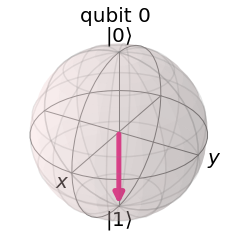

In [2]:
qc = QuantumCircuit(1)
qc.x(0)

state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

 <b> 2. Next, we would like to create superposition. That means $|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$

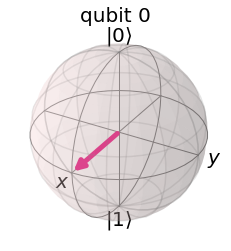

In [3]:
qc = QuantumCircuit(1)
qc.h(0)

state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

 <b> 3. Now, let us get the state $|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$

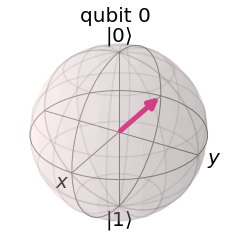

In [4]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)

state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

## Single qubit gate as rotations

Actually, those gates can be described as rotations, given by the angles $\theta, \phi$. This leads us to a more general description of a single qubit gate, which is given in terms of `u` (or `u3`- it will be deprecated soon). The general form of a single qubit gate is:

\begin{aligned}
U (\theta, \phi, \lambda)= \begin{pmatrix}
 \cos(\theta/2) & -e^{j\lambda} \sin(\theta/2)\\
 e^{j\phi}\sin(\theta/2) & e^{j(\lambda+ \phi)} \cos(\theta/2)
\end{pmatrix}
\end{aligned}

To compose any of the previous gates, we may use `u` with different choices for the parameters $\lambda, \phi$ and $\theta$ 

<b> 1. X-Gate <b>
    
\begin{aligned}
X=\begin{pmatrix}
 0 & 1\\
 1 & 0
\end{pmatrix}
\end{aligned}    

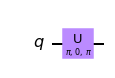

In [5]:
qcX = QuantumCircuit(1)
qcX.u(np.pi, 0, np.pi, 0)
qcX.draw('mpl')

<b> 2. Z-Gate <b>
    
\begin{aligned}
Z=\begin{pmatrix}
 1 & 0\\
0 & -1
\end{pmatrix}
\end{aligned}

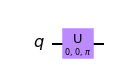

In [6]:
qcZ = QuantumCircuit(1)
qcZ.u(0, 0, np.pi, 0)
qcZ.draw('mpl')

<b> 3. Y-Gate <b>
    
\begin{aligned}
Y=\begin{pmatrix}
 0 & -i\\
i & 0
\end{pmatrix}
\end{aligned}

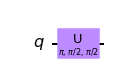

In [7]:
qcY = QuantumCircuit(1)
qcY.u(np.pi, np.pi/2, np.pi/2, 0)
qcY.draw('mpl')

<b> 4. H-Gate <b>
    
\begin{aligned}
H= \frac {1}{\sqrt{2}}\begin{pmatrix}
 1 & 1\\
1 & -1
\end{pmatrix}
\end{aligned}

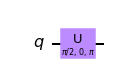

In [8]:
qcH = QuantumCircuit(1)
qcH.u(np.pi/2, 0, np.pi, 0)
qcH.draw('mpl')

### Measurements

In order to measure our results we need to store the quantum information in classical bits. We do this by writing a Quantum Circuit: `QuantumCircuit(n_qubits,n_bits)`, where `n_qubits` and `n_bits` respresent the qubits and classical bits respectively. 

These bits can then be read out during multiple runs, these then gives us a statistical representation of our quantum state.

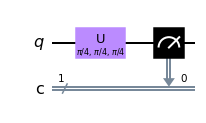

In [9]:
n_qubits = 1 #number of qubits
n_bits = 1 #number of bits

qc=QuantumCircuit(n_qubits,n_bits)
qc.u(np.pi/4,np.pi/4,np.pi/4,0)

qc.measure(0,0)

qc.draw('mpl')

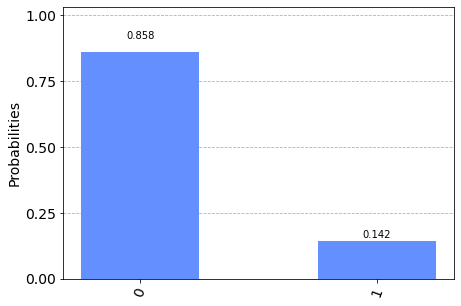

In [10]:
# we choose the simulator as our backend
backend = Aer.get_backend('qasm_simulator') 

# we run the simulation and get the counts
Counts = execute(qc, backend, shots = 1024,  seed_simulator=312).result().get_counts() 

# let us plot a histogram to see the possible outcomes and corresponding probabilities
plot_histogram(Counts)

## Multiple Qubit Gates

We will now look at how we represent multiple qubits. Some of the muliple qubits in qiskit:

    qc.cx(c,t)    # controlled X gate (CNOT)
    qc.cz(c,t)    # controlled Z-gate
    qc.cy(c,t)    # Controlled Y-gate
    qc.ch(c,t)    # Controlled Hadamard gate


Each of these gates required two inputs: `c` which is the control qubit and `t`, being the target qubit. 

###  CNOT-gate

Let's implement the CNOT gate

<b> 1. CNOT on the $|00\rangle$ state <b>

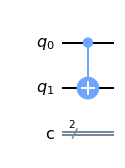

In [11]:
qc=QuantumCircuit(2,2)
qc.cx(0,1)

qc.draw('mpl')

<b> 2. CNOT on the $|10\rangle$ state <b>

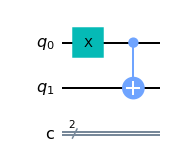

In [12]:
qc=QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)

qc.draw('mpl')

###  With CNOT gate we can build Bell states

<b> 1. Make the Bell state $|\Phi^+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)  $ <b>

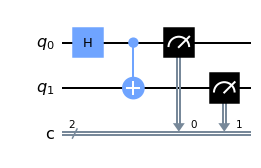

In [13]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)

for i in range(2):
    qc.measure(i,i)

qc.draw('mpl')

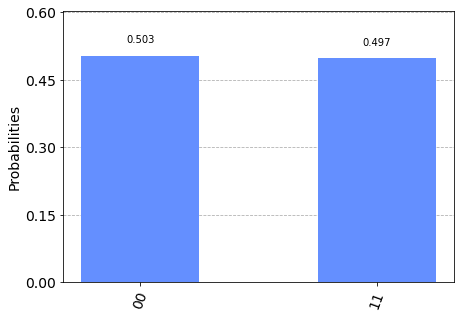

In [14]:
# we run the simulation and get the counts
# this will be better exaplained in the notebook 'qasm_simulator_and_visualization.ipynb' 
counts = execute(qc, backend, shots = 1024).result().get_counts() 

#plot histogram
plot_histogram(counts) 

<b> 2. Make a Bell state $|\Psi^-\rangle = \frac{1}{\sqrt{2}} (|10\rangle - |01\rangle)  $ <b>

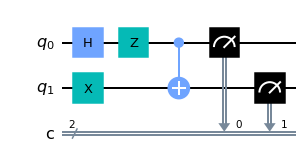

In [15]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.x(1)
qc.z(0)
qc.cx(0,1)

for i in range(2):
    qc.measure(i,i)

qc.draw('mpl')

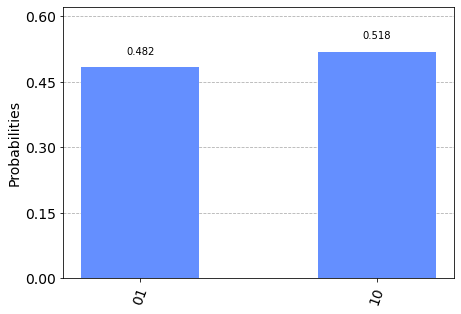

In [16]:
counts = execute(qc, backend, shots = 1024).result().get_counts()
plot_histogram(counts) 